# Python Programming for Finance

# Assignment 1 

# Preliminaries

It is possible to directly download financial data from the yahoo finance API, by using the companie's ticker, and two dates
expressed in UNIX time stamp (number of seconds after January 1 1970)

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
import time
# datetime date uses the yyyy, mm, dd format
before = int(time.mktime(datetime.date(2010,1,1).timetuple()))# Starting date
today  = int(time.mktime(datetime.date(2020,1,1).timetuple()))# Last date

In [11]:
ticker = 'tsla' # Download data for tesla

In [12]:
url=f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={before}&period2={today}&interval=1d&events=history&includeAdjustedClose=true"
url

'https://query1.finance.yahoo.com/v7/finance/download/tsla?period1=1262300400&period2=1577833200&interval=1d&events=history&includeAdjustedClose=true'

In [15]:
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


## Dataframe consists of
* Date in yyyy-mm-dd format
* Open  : Stock price at the beginning of the day
* High  : Maximum price during the trading day
* Low   : Lowest price over the trading day
* Close : Closing price by the end of the day
* Adj Close : Closing prices adjusting for splits and dividend payments
* Volume : Number of shares traded


# Assignment

## Exercise 1 (20 points)

Create a single dataframe that contains the daily stock price of Apple (aapl), Microsoft (msft), Tesla (tsla), Amazon (amzn), and Facebook (fb). Download only the information between January 1st 2010 and December 31 2020. Keep only the ticker, the date, and the adjusted close price. Use the function `time.sleep(1)` to wait one second before retreiving the data for each ticker. If you run into problems, use a `try except` block to understand where the code fails. 

Name the columns in such a way that is easier to access later on

In [23]:
tickers = ['aapl', 'msft', 'tsla', 'amzn', 'fb']

before = int(time.mktime(datetime.date(2010,1,1).timetuple()))# Starting date
today  = int(time.mktime(datetime.date(2020,12,31).timetuple()))# End date
df = pd.DataFrame()
for ticker in tickers:
    time.sleep(1)
    url=f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={before}&period2={today}&interval=1d&events=history&includeAdjustedClose=true"
    try: 
        temp = pd.read_csv(url)
        temp = temp.loc[:, ['Date', 'Adj Close']]
        temp['Ticker'] = ticker
        df = df.append(temp)
    except:
        print(url)

df = df.rename(columns = {'Date' : 'date', 'Adj Close' : 'prc', 'Ticker': 'ticker'})
df.head()

,date,prc,ticker
0,2009-12-31,6.462008,aapl
1,2010-01-04,6.562591,aapl
2,2010-01-05,6.573935,aapl
3,2010-01-06,6.469369,aapl
4,2010-01-07,6.457407,aapl


## Exercise 2 (20 Points)

Compute daily returns for every ticker by using the adjusted close price. For this sort your data, group it by ticker, and use the apply method. You can use the available function `shift(1)` to compute a one day lag on prices. 

In [31]:
df = df.sort_values(['ticker', 'date'])
df['ret'] = df.groupby('ticker').prc.apply(lambda x : (x/x.shift(1)-1))

In [33]:
df.head()

,date,prc,ticker,ret
0,2009-12-31,6.462008,aapl,NaN
1,2010-01-04,6.562591,aapl,0.015565
2,2010-01-05,6.573935,aapl,0.001729
3,2010-01-06,6.469369,aapl,-0.015906
4,2010-01-07,6.457407,aapl,-0.001849


## Exercise 3 (40 points)

In asset management, the high-water mark is defined as the maximum price that an asset has reached up to some time $t$. 

$ HWM_t = \max \{ p_s : s \leq t\}$

The maximum drawdown is defined as the percentage fall from the high-water mark. 

$MDD_t = (p_t - HWM_t)/HWM_t$


Using the adjusted close price as $p$ and any method (for loops, apply and lambda functions, etc) compute the high-water mark, and maximum drawdown, for every ticker and every point in time. Include it as a column in the dataframe. When using lags, always verify your data is sorted. Hint: you can use the `pd.DataFrame.cummax` function. 

In [43]:
df['hwm'] = df.groupby('ticker').prc.cummax()
df['mdd'] = (df.prc - df['hwm'])/df['hwm']

In [44]:
df.head()

,date,prc,ticker,ret,hwm,mdd
0,2009-12-31,6.462008,aapl,NaN,6.462008,0.000000
1,2010-01-04,6.562591,aapl,0.015565,6.562591,0.000000
2,2010-01-05,6.573935,aapl,0.001729,6.573935,0.000000
3,2010-01-06,6.469369,aapl,-0.015906,6.573935,-0.015906
4,2010-01-07,6.457407,aapl,-0.001849,6.573935,-0.017726


## Exercise 4 (20 points)

Pick a ticker in the sample, and plot the price and the high-water mark. Play with the `plt.plot()` function for aesthetics. 

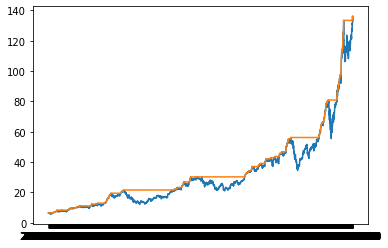

In [50]:
from matplotlib import pyplot as plt 

x = df.loc[df.ticker == 'aapl']

plt.plot(x.date, x.prc, zorder = 1)
plt.plot(x.date, x.hwm, zorder = 2)